In [1]:
%matplotlib inline

import gym
import matplotlib
import numpy as np
import sys

from collections import defaultdict

if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.blackjack import BlackjackEnv
from lib import plotting

matplotlib.style.use('ggplot')

def print_observation(observation):
    score, dealer_score, usable_ace = observation
    print("Player Score: {} (Usable Ace: {}), Dealer Score: {}".format(
          score, usable_ace, dealer_score))

In [2]:
env = BlackjackEnv()

In [3]:
def td_prediction(policy, env, num_episodes, discount_factor=1.0, alpha = 0.001):
    """
    Temporal Difference prediction algorithm. Calculates the value function
    for a given policy using sampling.
    
    Args:
        policy: A function that maps an observation to action probabilities.
        env: OpenAI gym environment.
        num_episodes: Nubmer of episodes to sample.
        discount_factor: Lambda discount factor.
    
    Returns:
        A dictionary that maps from state -> value.
        The state is a tuple and the value is a float.
    """
    
    # The final value function
    V = defaultdict(float)
    
    # Implement this!
    for i_episode in range(1, num_episodes+1):
        
        if i_episode % 1000 == 0:
            print("\rEpisode {}/{}".format(i_episode, num_episodes), end="")
            sys.stdout.flush()
        
        state = env.reset()
        while True:
            # interact with environment
            action = np.argmax(policy(state))
            next_state, reward, done, _ = env.step(action)
            
            # update values
            target = reward + discount_factor * V[next_state]
            delta = target - V[state]
            V[state] = V[state] + alpha * delta
            
            if done:
                break
            else:
                state = next_state

    return V 

In [4]:
def sample_policy(observation):
    """
    A policy that sticks if the player score is > 20 and hits otherwise.
    """
    score, dealer_score, usable_ace = observation
    return np.array([1.0, 0.0]) if score >= 20 else np.array([0.0, 1.0])

Episode 10000/10000

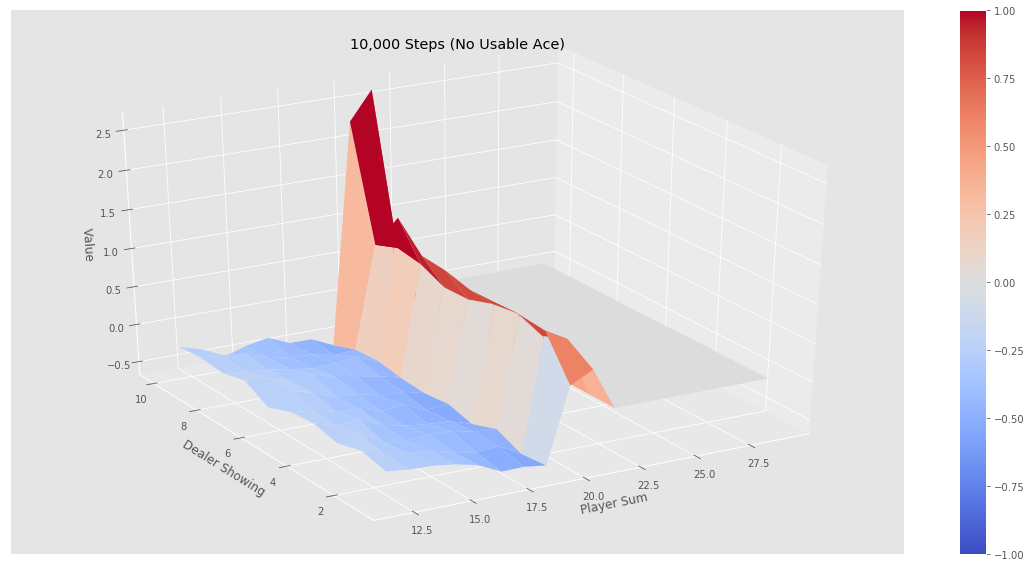

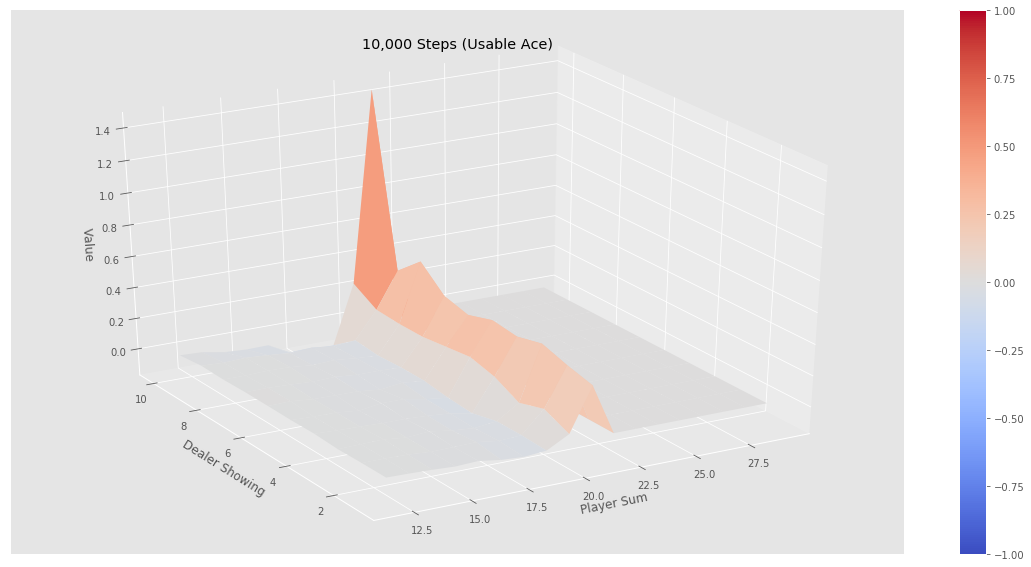

Episode 500000/500000

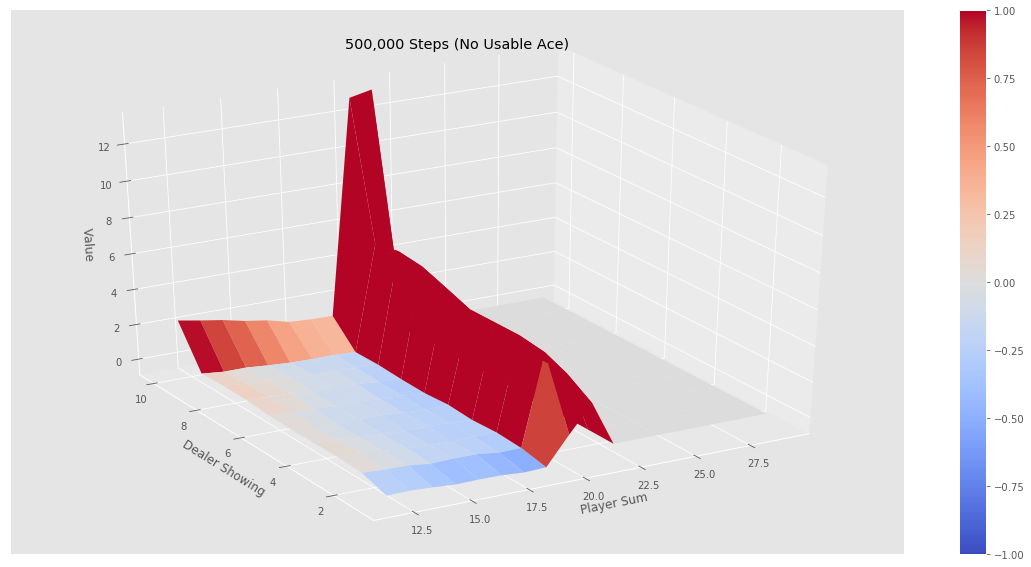

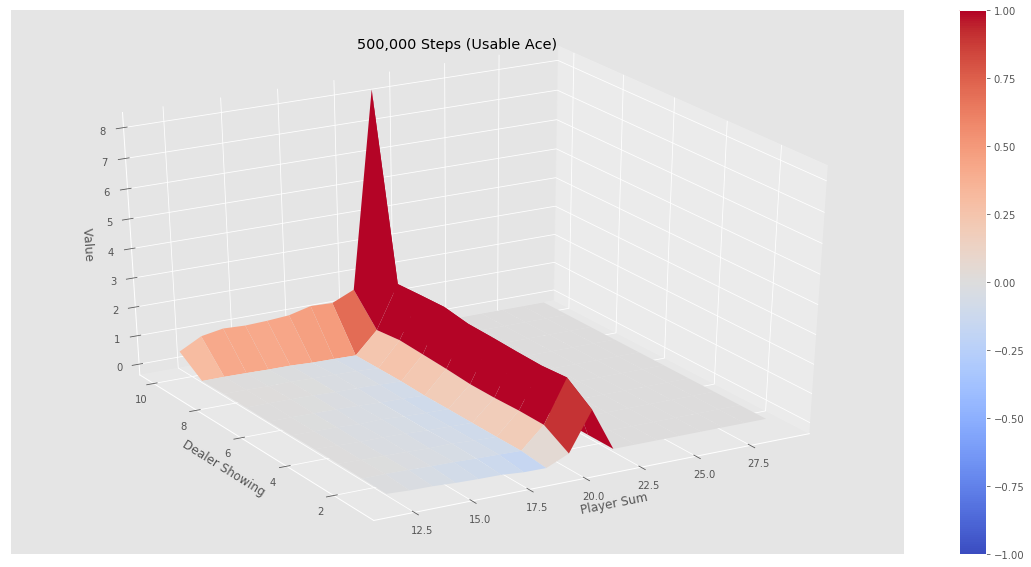

In [6]:
alpha = 0.01
V_10k = td_prediction(sample_policy, env, num_episodes=10000, alpha = alpha)
plotting.plot_value_function(V_10k, title="10,000 Steps")

V_500k = td_prediction(sample_policy, env, num_episodes=500000)
plotting.plot_value_function(V_500k, title="500,000 Steps")